# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U -q PyDrive
!pip install httplib2==0.15.0
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.files import GoogleDriveFileList
from google.colab import auth
from oauth2client.client import GoogleCredentials

from getpass import getpass
import urllib

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Cloning PAL_2021 to access modules.
# Need password to access private repo.

if 'CLIPPER' not in os.listdir():
    cmd_string = 'git clone https://github.com/PAL-ML/CLIPPER.git'
    os.system(cmd_string)

# Installation

## Install multi label metrics dependencies

In [3]:
! pip install scikit-learn==0.24

## Install CLIP dependencies

In [4]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 11.0


In [5]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.2MB/s eta 0:04:21tcmalloc: large alloc 1147494400 bytes == 0x56480e45a000 @  0x7f6e6ccd2615 0x5647a977acdc 0x5647a985a52a 0x5647a977dafd 0x5647a986efed 0x5647a97f1988 0x5647a97ec4ae 0x5647a977f3ea 0x5647a97f17f0 0x5647a97ec4ae 0x5647a977f3ea 0x5647a97ee32a 0x5647a986fe36 0x5647a97ed853 0x5647a986fe36 0x5647a97ed853 0x5647a986fe36 0x5647a97ed853 0x5647a986fe36 0x5647a98f23e1 0x5647a98526a9 0x5647a97bdcc4 0x5647a977e559 0x5647a97f24f8 0x5647a977f30a 0x5647a97ed3b5 0x5647a97ec7ad 0x5647a977f3ea 0x5647a97ed3b5 0x5647a977f30a 0x5647a97ed3b5
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:25tcmalloc: large alloc 1434370048 bytes == 0x5647abc82000 @  0x7f6e6ccd2615 0x5647a977acdc 0x5647a985a52a 0x5647a977dafd 0x5647a986efed 0x5647a97f1988 0x5647a97ec4ae 0x5647a977f3ea 0x5647a97f17f0 0x5647a97ec4ae 0x5647a977f3ea 0x5647a97ee32a 0x5647a986fe36 0x5647a97ed853 0

In [6]:
! pip install ftfy regex
! wget https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz -O bpe_simple_vocab_16e6.txt.gz

--2021-06-01 09:28:49--  https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.71, 13.107.213.71, 2620:1ec:bdf::71, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356917 (1.3M) [application/octet-stream]
Saving to: ‘bpe_simple_vocab_16e6.txt.gz’

bpe_simple_vocab_16 100%[===================>]   1.29M  --.-KB/s    in 0.06s   

2021-06-01 09:28:49 (22.7 MB/s) - ‘bpe_simple_vocab_16e6.txt.gz’ saved [1356917/1356917]



In [7]:
!pip install git+https://github.com/Sri-vatsa/CLIP # using this fork because of visualization capabilities

  Cloning https://github.com/Sri-vatsa/CLIP to /tmp/pip-req-build-_jx6os8y
  Running command git clone -q https://github.com/Sri-vatsa/CLIP /tmp/pip-req-build-_jx6os8y
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368623 sha256=5a99127abcd40f11e8b08d70b71030112498ebec041d505540c2ad3078e834e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-l_s24me7/wheels/cc/55/69/0d411dabbd5009fd069d47b47cf7839c54e595dc61725b307b
Successfully built clip


## Install clustering dependencies

In [8]:
!pip -q install umap-learn>=0.3.7

## Install dataset manager dependencies

In [9]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=edc5aa46ab410576991794d9c4bbf4f4072cff9a65bd37207b2c983f351ba241
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


# Imports

In [10]:
# ML Libraries
import tensorflow as tf
import tensorflow_hub as hub
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import keras

# Data processing
import PIL
import base64
import imageio
import pandas as pd
import numpy as np
import json

from PIL import Image
import cv2
from sklearn.feature_extraction.image import extract_patches_2d

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.core.display import display, HTML
from matplotlib import cm
import matplotlib.image as mpimg

# Models
import clip

# Datasets
import tensorflow_datasets as tfds

# Clustering
# import umap

from sklearn import metrics
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

# Misc
import progressbar
import logging
from abc import ABC, abstractmethod
import time
import urllib.request
import os
from sklearn.metrics import jaccard_score, hamming_loss, accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer


# Modules
from CLIPPER.code.ExperimentModules import embedding_models
from CLIPPER.code.ExperimentModules.dataset_manager import DatasetManager
from CLIPPER.code.ExperimentModules.weight_imprinting_classifier import WeightImprintingClassifier
from CLIPPER.code.ExperimentModules import simclr_data_augmentations
from CLIPPER.code.ExperimentModules.utils import (save_npy, load_npy, 
                                                       get_folder_id, 
                                                       create_expt_dir, 
                                                       save_to_drive, 
                                                       load_all_from_drive_folder, 
                                                       download_file_by_name, 
                                                       delete_file_by_name)

logging.getLogger('googleapicliet.discovery_cache').setLevel(logging.ERROR)

# Initialization & Constants

## Dataset details

In [11]:
dataset_name = 'Omniglot'
folder_name = "Omniglot-Embeddings-28-02-21"

# Change parentid to match that of experiments root folder in gdrive
parentid = '1bK72W-Um20EQDEyChNhNJthUNbmoSEjD'

# Filepaths
train_character_labels_filename = "train_character_labels.npz"
test_character_labels_filename = "test_character_labels.npz"
train_alphabet_labels_filename = "train_alphabet_labels.npz"
test_alphabet_labels_filename = "test_alphabet_labels.npz"

train_embeddings_filename_suffix = "_embeddings_train.npz"
test_embeddings_filename_suffix = "_embeddings_test.npz"


# Initialize sepcific experiment folder in drive
folderid = create_expt_dir(drive, parentid, folder_name)

title: Omniglot-Embeddings-28-02-21, id: 1nihzM07RBOqys9KX0FlYHJIVSIGXAB35
Experiment folder already exists. WARNING: Following with this run might overwrite existing results stored.


## Threshold range



In [12]:
min_threshold = 0.48
max_threshold = 0.75
threshold_stepsize = 0.01

## Few shot learning parameters

In [13]:
num_ways = 5 # [5, 20]
num_shot = 5 # [5, 1]
num_eval = 15 # [5, 10, 15, 19]
num_episodes = 100
shuffle = False

## Image embedding and augmentations

In [14]:
embedding_model = embedding_models.CLIPEmbeddingWrapper()
num_augmentations = 0 # [0, 5, 10]
trivial=False # [True, False]

## Training parameters

In [15]:
# List of number of epochs to train over, e.g. [5, 10, 15, 20]. [0] indicates no training.
train_epochs_arr = [0] 

# Load data

In [16]:
def get_ndarray_from_drive(drive, folderid, filename):
    download_file_by_name(drive, folderid, filename)
    return np.load(filename)['data']

train_alphabet_labels = get_ndarray_from_drive(drive, folderid, train_alphabet_labels_filename)
train_character_labels = get_ndarray_from_drive(drive, folderid, train_character_labels_filename)

test_alphabet_labels = get_ndarray_from_drive(drive, folderid, test_alphabet_labels_filename)
test_character_labels = get_ndarray_from_drive(drive, folderid, test_character_labels_filename)

# Create label dictionary

In [17]:
unique_alphabets = np.unique(test_alphabet_labels)
unique_characters = np.unique(test_character_labels)
print(len(unique_alphabets), len(unique_characters))

20 47


In [18]:
label_dictionary = {}

for i in range(len(test_alphabet_labels)):
    al = test_alphabet_labels[i]
    ch = test_character_labels[i]
    la = str(al)+'_'+str(ch)

    if la in label_dictionary.keys():
        label_dictionary[la].append(i)
    else:
        label_dictionary[la] = [i]

In [19]:
unique_labels = list(label_dictionary.keys())

# Weight Imprinting models on train data embeddings

## Function definitions

In [20]:
def start_progress_bar(bar_len):
    widgets = [
        ' [', 
        progressbar.Timer(format= 'elapsed time: %(elapsed)s'), 
        '] ', 
        progressbar.Bar('*'),' (', 
        progressbar.ETA(), ') ', 
        ]
    pbar = progressbar.ProgressBar(
        max_value=bar_len, widgets=widgets
        ).start()

    return pbar

In [21]:
def prepare_indices(
    num_ways,
    num_shot,
    num_eval,
    num_episodes,
    label_dictionary,
    labels,
    shuffle=False
):
    eval_indices = []
    train_indices = []
    wi_y = []
    eval_y = []

    label_dictionary = {la:label_dictionary[la] for la in label_dictionary if len(label_dictionary[la]) >= (num_shot+num_eval)}
    unique_labels = list(label_dictionary.keys())

    pbar = start_progress_bar(num_episodes)

    for s in range(num_episodes):
        # Setting random seed for replicability
        np.random.seed(s)

        _train_indices = []
        _eval_indices = []

        selected_labels = np.random.choice(unique_labels, size=num_ways, replace=False)
        for la in selected_labels:
            la_indices = label_dictionary[la]
            select = np.random.choice(la_indices, size = num_shot+num_eval, replace=False)
            tr_idx = list(select[:num_shot])
            ev_idx = list(select[num_shot:])

            _train_indices = _train_indices + tr_idx
            _eval_indices = _eval_indices + ev_idx

        if shuffle:
            np.random.shuffle(_train_indices)
            np.random.shuffle(_eval_indices)

        train_indices.append(_train_indices)
        eval_indices.append(_eval_indices)

        _wi_y = test_labels[_train_indices]
        _eval_y = test_labels[_eval_indices]

        wi_y.append(_wi_y)
        eval_y.append(_eval_y)

        pbar.update(s+1)
        
    return train_indices, eval_indices, wi_y, eval_y

In [22]:
def embed_images(
    embedding_model, 
    train_indices, 
    num_augmentations,
    trivial=False
    ):

    def augment_image(image, num_augmentations, trivial):
        """ Perform SimCLR augmentations on the image
        """

        if np.max(image) > 1:
            image = image/255

        augmented_images = [image]

        def _run_filters(image):
            width = image.shape[1]
            height = image.shape[0]
            image_aug = simclr_data_augmentations.random_crop_with_resize(
                image,
                height,
                width
                )
            image_aug = tf.image.random_flip_left_right(image_aug)
            image_aug = simclr_data_augmentations.random_color_jitter(image_aug)
            image_aug = simclr_data_augmentations.random_blur(
                image_aug,
                height,
                width
                )
            image_aug = tf.reshape(image_aug, [image.shape[0], image.shape[1], 3])
            image_aug = tf.clip_by_value(image_aug, 0., 1.)

            return image_aug.numpy()

        for _ in range(num_augmentations):
            if trivial:
                aug_image = image
            else:
                aug_image = _run_filters(image)
            augmented_images.append(aug_image)

        augmented_images = np.stack(augmented_images)
        return augmented_images

    embedding_model.load_model()

    unique_indices = np.unique(np.array(train_indices))

    dm = DatasetManager()
    ds = dm.load_dataset('omniglot', split='test')
    embeddings = []
    IMAGE_IDX = 'image'
    pbar = start_progress_bar(unique_indices.size+1)
    num_done=0
    for idx, item in enumerate(ds):
        if idx in unique_indices:
            image = item[IMAGE_IDX]
            if num_augmentations > 0:
                aug_images = augment_image(image, num_augmentations, trivial)
            else:
                aug_images = image
            
            processed_images = embedding_model.preprocess_data(aug_images)
            embedding = embedding_model.embed_images(processed_images)
            embeddings.append(embedding)
            
            num_done += 1
            pbar.update(num_done+1)

        if idx == unique_indices[-1]:
            break

    embeddings = np.stack(embeddings)

    return unique_indices, embeddings

In [23]:
def train_model_for_episode(
    indices_and_embeddings,
    train_indices,
    wi_y,
    num_augmentations,
    train_epochs=None,
    train_batch_size=5,
    multi_label=True
):

    train_embeddings = []
    train_labels = []
    ind = indices_and_embeddings[0]
    emb = indices_and_embeddings[1]

    for idx, tr_idx in enumerate(train_indices):
        train_embeddings.append(emb[np.argwhere(ind==tr_idx)[0][0]])
        train_labels += [wi_y[idx] for _ in range(num_augmentations+1)]
    train_embeddings = np.concatenate(train_embeddings)

    train_embeddings = WeightImprintingClassifier.preprocess_input(train_embeddings)

    wi_weights, label_mapping = WeightImprintingClassifier.get_imprinting_weights(
        train_embeddings, train_labels, False, multi_label
        )

    wi_parameters = {
        "num_classes": num_ways,
        "input_dims": train_embeddings.shape[-1],
        "scale": False,
        "dense_layer_weights": wi_weights,
        "multi_label": multi_label
    }

    wi_cls = WeightImprintingClassifier(wi_parameters)

    if train_epochs:
        # ep_y = train_labels
        rev_label_mapping = {label_mapping[val]:val for val in label_mapping}
        train_y = np.zeros((len(train_labels), num_ways))
        for idx_y, l in enumerate(train_labels):
            if multi_label:
                for _l in l:
                    train_y[idx_y, rev_label_mapping[_l]] = 1
            else:
                train_y[idx_y, rev_label_mapping[l]] = 1

        wi_cls.train(train_embeddings, train_y, train_epochs, train_batch_size)

    return wi_cls, label_mapping

In [24]:
def evaluate_model_for_episode(
    model,
    eval_x,
    eval_y,
    label_mapping,
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'classwise_accuracy', 'c_accuracy'],
    threshold=0.7,
    multi_label=True
):
    eval_x = WeightImprintingClassifier.preprocess_input(eval_x)
    logits = model.predict_scores(eval_x).tolist()

    if multi_label:
        pred_y = model.predict_multi_label(eval_x, threshold)
        pred_y = [[label_mapping[v] for v in l] for l in pred_y]

        met = model.evaluate_multi_label_metrics(
            eval_x, eval_y, label_mapping, threshold, metrics
            )
    else:
        pred_y = model.predict_single_label(eval_x)
        pred_y = [label_mapping[l] for l in pred_y]

        met = model.evaluate_single_label_metrics(
            eval_x, eval_y, label_mapping, metrics
            )
    return pred_y, met, logits

In [25]:
def run_episode_through_model(
    indices_and_embeddings,
    train_indices, 
    eval_indices, 
    wi_y, 
    eval_y,
    thresholds=None,
    num_augmentations=0,
    train_epochs=None,
    train_batch_size=5,
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'classwise_accuracy', 'c_accuracy'],
    embeddings=None,
    multi_label=True
):
    metrics_values = {m:[] for m in metrics}

    wi_cls, label_mapping = train_model_for_episode(
        indices_and_embeddings,
        train_indices,
        wi_y,
        num_augmentations,
        train_epochs,
        train_batch_size,
        multi_label=multi_label
    )

    eval_x = embeddings[eval_indices]
    ep_logits = []

    if multi_label:
        for t in thresholds:
            pred_labels, met, logits = evaluate_model_for_episode(
                wi_cls,
                eval_x,
                eval_y,
                label_mapping,
                threshold=t,
                metrics=metrics,
                multi_label=True
            )
            ep_logits.append(logits)
            for m in metrics:
                metrics_values[m].append(met[m])
    else:
        pred_labels, metrics_values, logits = evaluate_model_for_episode(
            wi_cls,
            eval_x,
            eval_y,
            label_mapping,
            metrics=metrics,
            multi_label=False
        )
        ep_logits = logits
    return metrics_values, ep_logits

In [26]:
def run_evaluations(
    indices_and_embeddings,
    train_indices, 
    eval_indices, 
    wi_y, 
    eval_y, 
    num_episodes, 
    num_ways,
    thresholds,
    verbose=True,
    normalize=True,
    train_epochs=None,
    train_batch_size=5,
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'classwise_accuracy', 'c_accuracy'],
    embeddings=None,
    num_augmentations=0,
    multi_label=True
):
    metrics_values = {m:[] for m in metrics}

    all_logits = []

    if verbose:
        pbar = start_progress_bar(num_episodes)

    for idx_ep in range(num_episodes):
        _train_indices = train_indices[idx_ep]
        _eval_indices = eval_indices[idx_ep]
        _wi_y = [[label] for label in wi_y[idx_ep]]
        _eval_y = [[label] for label in eval_y[idx_ep]]

        met, ep_logits = run_episode_through_model(
            indices_and_embeddings,
            _train_indices, 
            _eval_indices, 
            _wi_y, 
            _eval_y,
            num_augmentations=num_augmentations,
            train_epochs=train_epochs,
            train_batch_size=train_batch_size,
            embeddings=embeddings,
            thresholds=thresholds,
            metrics=metrics,
            multi_label=multi_label
        )

        all_logits.append(ep_logits)

        for m in metrics:
            metrics_values[m].append(met[m])

        if verbose:
            pbar.update(idx_ep+1)
    return metrics_values, all_logits

In [27]:
def get_max_mean_jaccard_index_by_threshold(metrics_thresholds):
    max_mean_jaccard = np.max([np.mean(mt['jaccard']) for mt in metrics_thresholds])
    return max_mean_jaccard

In [28]:
def get_max_mean_f1_score_with_threshold(metrics_thresholds):
    arr = np.array(metrics_thresholds['f1_score'])
    max_mean_jaccard = np.max(np.mean(arr, 0))
    threshold = np.argmax(np.mean(arr, 0))
    return max_mean_jaccard, threshold

In [29]:
def get_max_mean_jaccard_index_with_threshold(metrics_thresholds):
    arr = np.array(metrics_thresholds['jaccard'])
    max_mean_jaccard = np.max(np.mean(arr, 0))
    threshold = np.argmax(np.mean(arr, 0))
    return max_mean_jaccard, threshold

def get_max_mean_f1_score_with_threshold(metrics_thresholds):
    arr = np.array(metrics_thresholds['f1_score'])
    max_mean_jaccard = np.max(np.mean(arr, 0))
    threshold = np.argmax(np.mean(arr, 0))
    return max_mean_jaccard, threshold

In [30]:
def get_mean_max_jaccard_index_by_episode(metrics_thresholds):
    mean_max_jaccard = np.mean(np.max(np.array([mt['jaccard'] for mt in metrics_thresholds]), axis=0))
    return mean_max_jaccard

In [31]:
def plot_metrics_by_threshold(
    metrics_thresholds, 
    thresholds, 
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'classwise_accuracy', 'c_accuracy'],
    title_suffix=""
):
    legend = []

    fig = plt.figure(figsize=(10,10))
    if 'jaccard' in metrics:
        mean_jaccard_threshold = np.mean(np.array(metrics_thresholds['jaccard']), axis=0)
        opt_threshold_jaccard = thresholds[np.argmax(mean_jaccard_threshold)]
        plt.plot(thresholds, mean_jaccard_threshold, c='blue')
        plt.axvline(opt_threshold_jaccard, ls="--", c='blue')
        legend.append("Jaccard Index")
        legend.append(opt_threshold_jaccard)
    if 'hamming' in metrics:
        mean_hamming_threshold = np.mean(np.array(metrics_thresholds['hamming']), axis=0)
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='green')
        plt.axvline(opt_threshold_hamming, ls="--", c='green')
        legend.append("Hamming Score")
        legend.append(opt_threshold_hamming)
    if 'map' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['map']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='red')
        plt.axvline(opt_threshold_f1_score, ls="--", c='red')
        legend.append("mAP")
        legend.append(opt_threshold_f1_score)
    if 'o_f1' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['o_f1']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='yellow')
        plt.axvline(opt_threshold_f1_score, ls="--", c='yellow')
        legend.append("OF1")
        legend.append(opt_threshold_f1_score)
    if 'c_f1' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['c_f1']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='orange')
        plt.axvline(opt_threshold_f1_score, ls="--", c='orange')
        legend.append("CF1")
        legend.append(opt_threshold_f1_score)
    if 'o_precision' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['o_precision']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='purple')
        plt.axvline(opt_threshold_f1_score, ls="--", c='purple')
        legend.append("OP")
        legend.append(opt_threshold_f1_score)
    if 'c_precision' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['c_precision']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='cyan')
        plt.axvline(opt_threshold_f1_score, ls="--", c='cyan')
        legend.append("CP")
        legend.append(opt_threshold_f1_score)
    if 'o_recall' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['o_recall']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='brown')
        plt.axvline(opt_threshold_f1_score, ls="--", c='brown')
        legend.append("OR")
        legend.append(opt_threshold_f1_score)
    if 'c_recall' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['c_recall']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='pink')
        plt.axvline(opt_threshold_f1_score, ls="--", c='pink')
        legend.append("CR")
        legend.append(opt_threshold_f1_score)
    if 'c_accuracy' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['c_accuracy']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='maroon')
        plt.axvline(opt_threshold_f1_score, ls="--", c='maroon')
        legend.append("CACC")
        legend.append(opt_threshold_f1_score)
    if 'top1_accuracy' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['top1_accuracy']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='magenta')
        plt.axvline(opt_threshold_f1_score, ls="--", c='magenta')
        legend.append("TOP1")
        legend.append(opt_threshold_f1_score)
    if 'top5_accuracy' in metrics:
        mean_f1_score_threshold = np.mean(np.array(metrics_thresholds['top5_accuracy']), axis=0)
        opt_threshold_f1_score = thresholds[np.argmax(mean_f1_score_threshold)]
        plt.plot(thresholds, mean_f1_score_threshold, c='slategray')
        plt.axvline(opt_threshold_f1_score, ls="--", c='slategray')
        legend.append("TOP5")
        legend.append(opt_threshold_f1_score)
    
    plt.xlabel('Threshold')
    plt.ylabel('Value')
    plt.legend(legend)
    title = title_suffix+"\nMulti label metrics by threshold"
    plt.title(title)
    plt.grid()

    fname = os.path.join(PLOT_DIR, title_suffix)
    plt.savefig(fname)
    
    plt.show()
   

## Setting multiple thresholds

In [32]:
thresholds = np.arange(min_threshold, max_threshold, threshold_stepsize)
thresholds

array([0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58,
       0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69,
       0.7 , 0.71, 0.72, 0.73, 0.74])

# Main

## Picking indices

In [33]:
test_labels = [str(test_alphabet_labels[i]) + "_" + str(test_character_labels[i]) for i in range(len(test_character_labels))]
test_labels = np.array(test_labels)

In [34]:
train_indices, eval_indices, wi_y, eval_y = prepare_indices(
    num_ways, num_shot, num_eval, num_episodes, label_dictionary, test_labels, shuffle
)

 [elapsed time: 0:00:00] |                                  | (ETA:  --:--:--) 

In [35]:
indices, embeddings = embed_images(
    embedding_model, 
    train_indices, 
    num_augmentations,
    trivial=trivial
    )

100%|███████████████████████████████████████| 354M/354M [00:07<00:00, 45.0MiB/s]


Shuffling and writing examples to /root/tensorflow_datasets/omniglot/3.0.0.incompleteA1ZDQ2/omniglot-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/omniglot/3.0.0.incompleteA1ZDQ2/omniglot-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/omniglot/3.0.0.incompleteA1ZDQ2/omniglot-small1.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/omniglot/3.0.0.incompleteA1ZDQ2/omniglot-small2.tfrecord


Dataset omniglot downloaded and prepared to /root/tensorflow_datasets/omniglot/3.0.0. Subsequent calls will reuse this data.


 [elapsed time: 0:00:48] |**********************************| (ETA:  00:00:00) 

## CLIP

In [36]:
clip_embeddings_test_fn = "clip" + test_embeddings_filename_suffix
clip_embeddings_test = get_ndarray_from_drive(drive, folderid, clip_embeddings_test_fn)

In [37]:
import warnings

warnings.filterwarnings('ignore')
if train_epochs_arr == [0]:
    if trivial:
        results_filename = "new_metrics"+dataset_name+"_0t"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_with_logits.json"
    else:
        results_filename = "new_metrics"+dataset_name+"_0t"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_with_logits.json"
else:
    if trivial:
        results_filename = "new_metrics"+dataset_name+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_with_logits.json"
    else:
        results_filename = "new_metrics"+dataset_name+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_with_logits.json"

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download_file_by_name(drive, folderid, results_filename)
if results_filename in os.listdir():
    with open(results_filename, 'r') as f:
        json_loaded = json.load(f)
        clip_metrics_over_train_epochs = json_loaded['metrics']
        logits_over_train_epochs = json_loaded["logits"]
else:
    clip_metrics_over_train_epochs = []  
    logits_over_train_epochs = []   

multi_label=True
thresholds_val = thresholds # None
metrics_vals = ['hamming', 'jaccard', 'f1_score'] # ['accuracy', 'f1_score']

for idx, train_epochs in enumerate(train_epochs_arr):
    if idx < len(clip_metrics_over_train_epochs):
        continue
    print(train_epochs)
    clip_metrics_thresholds, all_logits = run_evaluations(
        (indices, embeddings),
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        thresholds,
        train_epochs=train_epochs,
        num_augmentations=num_augmentations,
        embeddings=clip_embeddings_test
    )
    clip_metrics_over_train_epochs.append(clip_metrics_thresholds)
    logits_over_train_epochs.append(all_logits)

    fin_list = []
    for a1 in wi_y:
      fin_a1_list = []
      for a2 in a1:
        new_val = str(a2)
        fin_a1_list.append(new_val)
      fin_list.append(fin_a1_list)

    with open(results_filename, 'w') as f:
        results = {'metrics': clip_metrics_over_train_epochs,
                   "logits": logits_over_train_epochs,
                   "true_labels": fin_list}
        json.dump(results, f)
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    delete_file_by_name(drive, folderid, results_filename)
    save_to_drive(drive, folderid, results_filename)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

0


 [elapsed time: 0:07:50] |**********************************| (ETA:  00:00:00) WARNING:googleapiclient.discovery_cache:file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__i

Uploaded test2_new_metricsOmniglot_0t5w5s0a_metrics_with_logits.json to https://drive.google.com/drive/u/1/folders/1nihzM07RBOqys9KX0FlYHJIVSIGXAB35


In [38]:
def get_best_metric_and_threshold(mt, metric_name, thresholds, optimal='max'):
    if optimal=='max':
        opt_value = np.max(np.mean(np.array(mt[metric_name]), axis=0))
        opt_threshold = thresholds[np.argmax(np.mean(np.array(mt[metric_name]), axis=0))]
    if optimal=='min':
        opt_value = np.min(np.mean(np.array(mt[metric_name]), axis=0))
        opt_threshold = thresholds[np.argmin(np.mean(np.array(mt[metric_name]), axis=0))]

    return opt_value, opt_threshold

In [39]:
all_metrics = ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy', 'top1_accuracy', 'top5_accuracy']

f1_vals = []
f1_t_vals = []
jaccard_vals = []
jaccard_t_vals = []

final_dict = {}
for ind_metric in all_metrics:
  vals = []
  t_vals = []
  final_array = []
  for mt in clip_metrics_over_train_epochs:
    if ind_metric == "hamming":
      ret_val, ret_t_val = get_best_metric_and_threshold(mt,ind_metric,thresholds,"min")
    else:
      ret_val, ret_t_val = get_best_metric_and_threshold(mt,ind_metric,thresholds,"max")
    vals.append(ret_val)
    t_vals.append(ret_t_val)

  final_array.append(vals)
  final_array.append(t_vals)
  final_dict[ind_metric] = final_array

if trivial:
    graph_filename = "new_metrics"+dataset_name+"_0t"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"
else:
    graph_filename = "new_metrics"+dataset_name+"_0t"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"

with open(graph_filename, 'w') as f:
        json.dump(final_dict, f)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
delete_file_by_name(drive, folderid, graph_filename)
save_to_drive(drive, folderid, graph_filename)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

Deleting new_metricsOmniglot_0t5w5s0a_metrics_graphs.json from GDrive
Uploaded new_metricsOmniglot_0t5w5s0a_metrics_graphs.json to https://drive.google.com/drive/u/1/folders/1nihzM07RBOqys9KX0FlYHJIVSIGXAB35


In [40]:
if trivial:
    PLOT_DIR = "NewMetrics_WeightImprintingSigmoid_MultiPred_Train_Augmentations_Omniglot" + str(num_ways) + "w" + str(num_shot) + "s" + str(num_augmentations) + "a_trivial_plots"
else:
    PLOT_DIR = "NewMetrics_WeightImprintingSigmoid_MultiPred_Train_Augmentations_Omniglot" + str(num_ways) + "w" + str(num_shot) + "s" + str(num_augmentations) + "a_plots"
os.mkdir(PLOT_DIR)

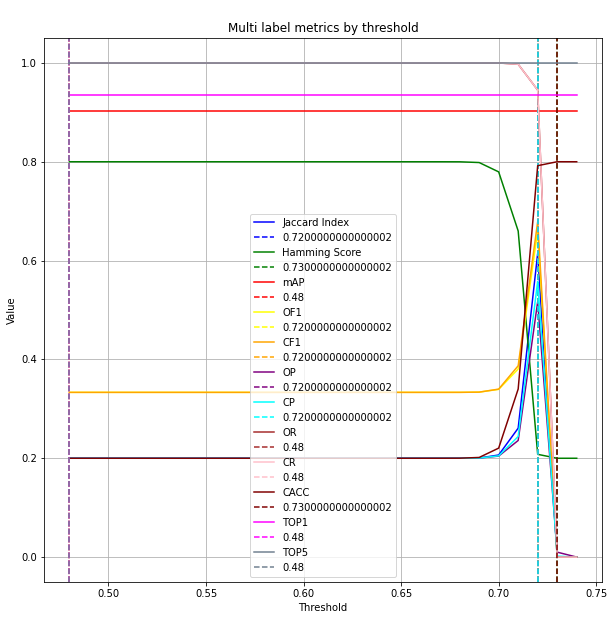

In [41]:
for mt in clip_metrics_over_train_epochs:
    plot_metrics_by_threshold(mt, thresholds, metrics=all_metrics)